<a href="https://colab.research.google.com/github/aleshweta/NFL_Combine_and_Pro_Day_Dataset/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>NFL Combine and Pro Day Data from 1987 - 2021 Dataset</h1>
<h2>Exploratory Data Analysis</h2>
<h3>Part 1: Introduction</h3>

The NFL Combine and Pro Day Data tracks key metrics and attributes that professional coaches and scouts deem to be crucial in making decisions on whom they should draft to their organization. The <a href="https://usa.inquirer.net/75172/what-to-know-about-the-nfl-combine">NFL Combine</a> is an invitation-only showcase event held annually at Lucas Oil Stadium in Indianapolis, Indiana for draft-eligible college athletes. These athletes are considered the top football prospects in the country. In addition, colleges and universities will hold their own "combine" in which their student athletes get to run a battery of tests in the same ilk as the NFL Combine. Scouts are invited to assess these athletes. Within this structure, the athletes get to showcase their skills in the comfort of their home stadium.

The crowning jewel metric of the NFL Combine is the 40-yard dash. The analysis for this dataset will revolve around identifying attributes that positively correlate to a fast 40-yard dash. Note that the lower the number for the speed categories (40 yard, Shuttle, and Cone) is viewed as high-performing. For example a 40-yard time of 4.30 is viewed more favorably than a 4.50. 


<h3>Part 2: Data Summary</h3>
The following <a href="https://github.com/josedv82/public_sport_science_datasets/tree/main/NFL%20Combine">original dataset</a> contains 13230 rows and 13 attributes. These attributes are:

* Year: The year of the combine. The years are from 1987 through 2021 (inclusive).
* College: The college the athlete attends.
* POS: The main position the athlete plays.
* Height (in): Height of the athlete.
* Weight (lbs): Weight of the athlete.
* Wonderlic: An assessment used to measure cognitive and problem-solving activity. It is viewed by many as an IQ test translatable to sound decision-making in the field of play. The highest achievable score is 50 and the lowest is 0. 
* 40 Yard (sec): The seconds it takes to sprint 40-yards.
* Bench Press: The number of times an athlete can bench 225 pounds in one set. 
* Vert Leap (in): The number of inches an athlete can jump **vertically** while flat-footed. 
* Broad Jump (in): The number of inches an athlete can jump **horizontally** while flat-footed. 
* Shuttle (sec): The time it takes in seconds, to sprint from a three-point stance,  five yards in one direction, then ten yards backwards in the other direction, and lastly five yards through the starting point. In total it covers 20 yards. 
* 3Cone (sec): A drill that consists of five-yard sprints and turns, that uses 3 cones to guide the athlete as they complete the L-shaped run. 


<h3>Part 3: Data Cleaning and Feature Engineering</h3>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("https://raw.githubusercontent.com/josedv82/public_sport_science_datasets/main/NFL%20Combine/NFL%20Combine%20and%20pro%20day%20data%20(1987%20-%202021).csv")
print(df.shape)
df.tail()

(13230, 13)


,Year,Name,College,POS,Height (in),Weight (lbs),Wonderlic,40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone
13225,1987,Rod Woodson,Purdue,CB,72.0,202,NaN,4.33,10.0,36.0,125.0,3.98,NaN
13226,1987,John Wooldridge,Ohio State,RB,68.4,193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13227,1987,Dave Wyman,Stanford,ILB,74.0,235,NaN,4.79,23.0,29.0,118.0,4.30,NaN
13228,1987,Theo Young,Arkansas,TE,74.0,231,NaN,4.89,9.0,30.0,107.0,4.20,NaN
13229,1987,Jeff Zimmerman,Florida,OG,75.4,341,NaN,5.36,22.0,22.5,NaN,4.83,NaN


In [2]:
#Add a metric description to a few column names for easier read.  
df = df.rename(columns={'40 Yard': '40 Yard (sec)', 'Shuttle': 'Shuttle (sec)', '3Cone': '3Cone (sec)'})

In [3]:
#Here we are identifying the total number of nulls for each category.
df.isnull().sum()

Year                   0
Name                   0
College                5
POS                    0
Height (in)            0
Weight (lbs)           0
Wonderlic          12799
40 Yard (sec)       1343
Bench Press         3409
Vert Leap (in)      1795
Broad Jump (in)     1902
Shuttle (sec)       2639
3Cone (sec)         5295
dtype: int64

In [4]:
df["POS"].unique()

array(['WR', 'CB', 'FS', 'OG', 'RB', 'TE', 'ILB', 'OT', 'DE', 'FB', 'OLB',
       'C', 'LS', 'DT', 'QB', 'K', 'SS', 'P', 'S', 'LB', 'EDG', 'OL',
       'DB', 'DL', 'NT'], dtype=object)

By extracting the values from the "POS" (position) column, we can see that there are 25 unique positions which, based on information from <a href="https://www.rookieroad.com/football/positions/">this site</a>, stand for:

* WR = wide reciever
* CB = cornerback
* FS = free safety
* OG = offensive guard
* RB = running back
* TE = tight end
* ILB = inside linebacker
* OT = offensive tackle
* DE = defensive end
* FB = fullback
* OLB = outside linebacker
* C = center
* LS = long snapper
* DT = defensive tackle
* QB = quarterback
* K = kicker
* SS = strong safety
* P = punter
* S = safety
* LB = linebacker
* EDG = edge rusher
* OL = offensive lineman
* DB = defensive back
* DL = defensive lineman
* NT = nose tackle

It should be noted that these are not necessarily 25 unique positions in the sport of football, but rather categories by which the players identify themselves. For example, some players recorded their position as "NT" or nose tackle. However, in football, the nose tackle is part of the defensive line, so these players could just as easily have identified themselves as "DL", or defensive linemen. It likely depends on how they individually wish to market their skillset in order to seem more attractive to scounts looking to draft NFL players.

Because there are so many different potential positions with unclear boundries between each category, it seems prudent to simply create a new attribute "Part of Game", which assigns one of two values to the player based on their position: "LOS" or "NLOS", standing for line of scrimmage vs. non-line of scrimmage.

In football, the players who play at the line of scrimmage are those who do the brunt of the blocking, pushing, and tackling. They do not run for the most part, as they usually physically opposed by the opposite team. As such, these players tend to be bigger so as to maximize their blocking power. Some positions which operate on the line of scrimmage include offensive lineman, defensive lineman, and linebacker, to name a few. Non-line of scrimmage players is a slightly looser category. It includes positions like wide reciever, which involves lots of running and catching, and punter, which does neither. While the quarterback and the long snapper both operate relatively near the line of scrimmage, as opposed to, say, a wide reciever, we still categorize both as part of the non-line of scrimmage players, because in general their job is completely different to that of the players who are directly on the line of scrimmage, physically holding off the opposing team.

The full categorization of the positions is as follows:

<u>Non-Line of Scrimmage (NLOS)</u>: QB (quarterback), RB (running back), WR (wide reciever), CB (cornerback), FS (free safety), SS (strong safety), DB (defensive back), FB (fullback), K (kicker), P (punter), LS (long snapper), S (safety), TE (tight end)

<u>Line of Scrimmage (LOS)</u>: C (center), NT (nose tackle), DT (defensive tackle), OT (offensive tackle), OL (offensive linemen), DL (defensive linemen), DE (defensive end), OG (offensive guard), ILB (inside linebacker), OLB (outside linebacker), LB (linebacker), EDG (edge rusher)

By separating the data in this way, we are more easily able to convert the categorical data of position into a binary framework to compare with the other numerical attributes.

In [5]:
los_list = []

for x in df["POS"]:
  if (x == "C" or x == "NT" or x == "DT" or x == "OT" or x == "OL" or x == "DL" or x == "DE" or 
  x == "OG" or x == "ILB" or x == "OLB" or x == "LB" or x == "EDG"):
    los_list.append("LOS")
  else:
    los_list.append("NLOS")

df["Part of Game"] = los_list

df.head(10)

,Year,Name,College,POS,Height (in),Weight (lbs),Wonderlic,40 Yard (sec),Bench Press,Vert Leap (in),Broad Jump (in),Shuttle (sec),3Cone (sec),Part of Game
0,2021,Jonathan Adams,Arkansas State,WR,74.00,210,NaN,4.59,NaN,39.0,132.0,4.38,7.04,NLOS
1,2021,Paulson Adebo,Stanford,CB,73.00,198,NaN,4.45,18.0,36.5,121.0,4.13,6.69,NLOS
2,2021,DAngelo Amos,Virginia,FS,71.75,191,NaN,4.58,11.0,34.5,119.0,4.33,6.98,NLOS
3,2021,Jack Anderson,Texas Tech,OG,76.63,314,NaN,5.27,27.0,29.5,105.0,4.83,7.88,LOS
4,2021,Otis Anderson,Central Florida,RB,67.50,179,NaN,4.65,11.0,36.0,113.0,4.42,7.04,NLOS
5,2021,Zayne Anderson,Brigham Young,FS,73.88,206,NaN,4.44,11.0,34.0,120.0,4.20,6.78,NLOS
6,2021,Cary Angeline,North Carolina State,TE,78.50,245,NaN,4.89,12.0,29.0,109.0,4.59,7.19,NLOS
7,2021,Rayshard Ashby,Virginia Tech,ILB,70.25,232,NaN,4.93,24.0,31.5,114.0,4.32,7.17,LOS
8,2021,Calvin Ashley,Florida A&M,OT,78.13,314,NaN,5.55,15.0,29.0,105.0,5.00,8.46,LOS
9,2021,Tutu Atwell,Louisville,WR,68.88,155,NaN,4.39,NaN,33.0,117.0,4.09,6.87,NLOS


In [6]:
#Here are the data types of each attribute. We can identify the categorical types: Year, Name, College, Position. 
df.dtypes

Year                 int64
Name                object
College             object
POS                 object
Height (in)        float64
Weight (lbs)         int64
Wonderlic          float64
40 Yard (sec)      float64
Bench Press        float64
Vert Leap (in)     float64
Broad Jump (in)    float64
Shuttle (sec)      float64
3Cone (sec)        float64
Part of Game        object
dtype: object

Now we can start to clean up the data. Here are some observations:
1. There are lots of nulls for the Wonderlic Test. The reason is that it took some time for the test to gain traction in the NFL. Also, many athletes opt out of this test for a variety of reasons. Although it would be interesting to see the relationship between the Wonderlic test and the 40-yard dash, the data is too sparse. 

2. There are quite a few nulls for each of the numerical types. The reason is that athletes don't need to perform in all the drills. They can choose based on what will showcase their skills in the best light.

In [7]:
#1. Dropping the Wonderlic test
df.drop('Wonderlic', axis=1, inplace=True)

df.head()

,Year,Name,College,POS,Height (in),Weight (lbs),40 Yard (sec),Bench Press,Vert Leap (in),Broad Jump (in),Shuttle (sec),3Cone (sec),Part of Game
0,2021,Jonathan Adams,Arkansas State,WR,74.00,210,4.59,NaN,39.0,132.0,4.38,7.04,NLOS
1,2021,Paulson Adebo,Stanford,CB,73.00,198,4.45,18.0,36.5,121.0,4.13,6.69,NLOS
2,2021,DAngelo Amos,Virginia,FS,71.75,191,4.58,11.0,34.5,119.0,4.33,6.98,NLOS
3,2021,Jack Anderson,Texas Tech,OG,76.63,314,5.27,27.0,29.5,105.0,4.83,7.88,LOS
4,2021,Otis Anderson,Central Florida,RB,67.50,179,4.65,11.0,36.0,113.0,4.42,7.04,NLOS


Given that college and year have little to no effect on the physical attributes we are primarily interested in (40 yard, Weight, Shuttle, etc.), we chose to eliminate those columns as well.


In [8]:
df.drop('College', axis=1, inplace=True)
df.drop('Year', axis=1, inplace=True)

print(df.isnull().sum())

Name                  0
POS                   0
Height (in)           0
Weight (lbs)          0
40 Yard (sec)      1343
Bench Press        3409
Vert Leap (in)     1795
Broad Jump (in)    1902
Shuttle (sec)      2639
3Cone (sec)        5295
Part of Game          0
dtype: int64


We can see that over a third of the values for "3Cone (sec)" are missing. Since 3 Cone is a drill that tests agility, similar to Shuttle, we chose to remove the 3 Cone column, and keep the Shuttle column, because it has fewer null values, and we can still retain some measure of agility in our data.

In [9]:
df.drop('3Cone (sec)', axis=1, inplace=True)

print(df.isnull().sum())

Name                  0
POS                   0
Height (in)           0
Weight (lbs)          0
40 Yard (sec)      1343
Bench Press        3409
Vert Leap (in)     1795
Broad Jump (in)    1902
Shuttle (sec)      2639
Part of Game          0
dtype: int64


In [10]:
#Since the response variable is the 40 yard dash, we should remove the variable's nulls as well. 
df = df.dropna(subset=['40 Yard (sec)'])
print(df.isnull().sum())

Name                  0
POS                   0
Height (in)           0
Weight (lbs)          0
40 Yard (sec)         0
Bench Press        2599
Vert Leap (in)      641
Broad Jump (in)     782
Shuttle (sec)      1403
Part of Game          0
dtype: int64


In [11]:
print(df.isnull().sum())
#Now we can see that the 40 yard dash has no more nulls.

print("Here is the worst time for the 40-yard dash: ", df['40 Yard (sec)'].max())
print("Here is the best time for the 40-yard dash: ", df['40 Yard (sec)'].min())

Name                  0
POS                   0
Height (in)           0
Weight (lbs)          0
40 Yard (sec)         0
Bench Press        2599
Vert Leap (in)      641
Broad Jump (in)     782
Shuttle (sec)      1403
Part of Game          0
dtype: int64
Here is the worst time for the 40-yard dash:  6.12
Here is the best time for the 40-yard dash:  4.21


In [12]:
#The bench press nulls are interesting because the faster athletes in the NFL tend to be lighter.
#Many of them do not see any advantage in performing the bench press test.

#Removing the nulls from the bench press variable. 
df = df.dropna(subset=['Bench Press'])
df

,Name,POS,Height (in),Weight (lbs),40 Yard (sec),Bench Press,Vert Leap (in),Broad Jump (in),Shuttle (sec),Part of Game
1,Paulson Adebo,CB,73.00,198,4.45,18.0,36.5,121.0,4.13,NLOS
2,DAngelo Amos,FS,71.75,191,4.58,11.0,34.5,119.0,4.33,NLOS
3,Jack Anderson,OG,76.63,314,5.27,27.0,29.5,105.0,4.83,LOS
4,Otis Anderson,RB,67.50,179,4.65,11.0,36.0,113.0,4.42,NLOS
5,Zayne Anderson,FS,73.88,206,4.44,11.0,34.0,120.0,4.20,NLOS
...,...,...,...,...,...,...,...,...,...,...
13224,Tony Woods,DE,74.80,249,4.85,18.0,29.0,115.0,4.55,LOS
13225,Rod Woodson,CB,72.00,202,4.33,10.0,36.0,125.0,3.98,NLOS
13227,Dave Wyman,ILB,74.00,235,4.79,23.0,29.0,118.0,4.30,LOS
13228,Theo Young,TE,74.00,231,4.89,9.0,30.0,107.0,4.20,NLOS


In [13]:
print(df.isnull().sum())

Name                 0
POS                  0
Height (in)          0
Weight (lbs)         0
40 Yard (sec)        0
Bench Press          0
Vert Leap (in)     398
Broad Jump (in)    501
Shuttle (sec)      927
Part of Game         0
dtype: int64


In [14]:
#Vertical Leap, Broad jump, and Shuttle are all valuable metrics and we need to preserve as much of that data as possible.
#We will apply the median to the remaining nulls. 

#Reference: https://www.statology.org/pandas-fillna-with-median/#:~:text=You%20can%20use%20the%20fillna,values%20in%20a%20pandas%20DataFrame.

df['Vert Leap (in)'] = df['Vert Leap (in)'].fillna(df['Vert Leap (in)'].median())
df['Broad Jump (in)'] = df['Broad Jump (in)'].fillna(df['Broad Jump (in)'].median())
df['Shuttle (sec)'] = df['Shuttle (sec)'].fillna(df['Shuttle (sec)'].median())


#The nulls are now taken care of. 
print(df.isnull().sum())

Name               0
POS                0
Height (in)        0
Weight (lbs)       0
40 Yard (sec)      0
Bench Press        0
Vert Leap (in)     0
Broad Jump (in)    0
Shuttle (sec)      0
Part of Game       0
dtype: int64


In [15]:
#Check for any duplicate rows 
duplicate = df[df.duplicated(keep='last')]
duplicate.shape

(0, 10)

There are no duplicate rows.

In [16]:
#check for any invalid variables
for k in df:
  print(df[k].unique(),'\n')

['Paulson Adebo' 'DAngelo Amos' 'Jack Anderson' ... 'Dave Wyman'
 'Theo Young' 'Jeff Zimmerman'] 

['CB' 'FS' 'OG' 'RB' 'TE' 'ILB' 'OT' 'DE' 'WR' 'FB' 'OLB' 'C' 'LS' 'SS'
 'DT' 'S' 'LB' 'P' 'QB' 'EDG' 'OL' 'DB' 'DL' 'NT' 'K'] 

[73.   71.75 76.63 67.5  73.88 78.5  70.25 78.13 75.13 72.5  74.88 79.38
 75.75 72.38 75.25 77.38 70.   75.5  72.75 76.88 74.75 71.13 69.5  72.25
 71.38 70.75 76.5  70.38 80.25 69.75 73.75 77.5  69.63 67.88 76.25 78.25
 76.13 74.63 77.88 74.13 69.13 75.38 72.   67.63 78.63 75.   73.5  80.
 71.5  73.63 70.13 71.   77.25 68.63 76.75 78.38 68.38 72.13 72.88 71.63
 76.   68.25 75.88 69.   77.   67.75 68.88 78.75 70.5  72.63 78.   70.63
 73.38 74.   74.5  76.38 66.88 70.88 73.13 77.63 74.25 71.25 74.38 77.75
 75.63 71.88 68.75 69.38 68.5  67.25 77.13 68.   79.63 68.13 79.25 69.25
 80.38 66.   69.88 73.25 80.13 79.   79.5  66.63 79.88 67.   61.88 80.63
 78.88 66.38 67.13 81.63 65.88 79.13 80.5  67.38 65.75 66.75 80.88 66.13
 65.25 79.75 76.3  73.8  66.8  66.25 72.3  7

In [17]:
#Change the datatype of some columns
df["Bench Press"] = df["Bench Press"].astype("int64")
df["Broad Jump (in)"] = df["Broad Jump (in)"].astype("int64")

In [18]:
#Scale the numerical datas, in order to use machine learning algorithmns. K
scaler = StandardScaler()
df[['Height (in)', 'Weight (lbs)','40 Yard (sec)','Bench Press','Vert Leap (in)','Broad Jump (in)','Shuttle (sec)']] = StandardScaler().fit_transform(df[['Height (in)', 'Weight (lbs)','40 Yard (sec)','Bench Press','Vert Leap (in)','Broad Jump (in)','Shuttle (sec)']])
df.head()


,Name,POS,Height (in),Weight (lbs),40 Yard (sec),Bench Press,Vert Leap (in),Broad Jump (in),Shuttle (sec),Part of Game
1,Paulson Adebo,CB,-0.304791,-1.071580,-1.201613,-0.279196,1.024714,0.829685,-1.201644,NLOS
2,DAngelo Amos,FS,-0.771174,-1.226157,-0.792478,-1.350628,0.548184,0.622734,-0.406778,NLOS
3,Jack Anderson,OG,1.049586,1.489976,1.379087,1.098360,-0.643141,-0.825919,1.580386,LOS
4,Otis Anderson,RB,-2.356878,-1.491145,-0.572174,-1.350628,0.905582,0.001883,-0.049089,NLOS
5,Zayne Anderson,FS,0.023543,-0.894921,-1.233085,-1.350628,0.429052,0.726209,-0.923441,NLOS


#Outliers

##Checking graphs for outliers

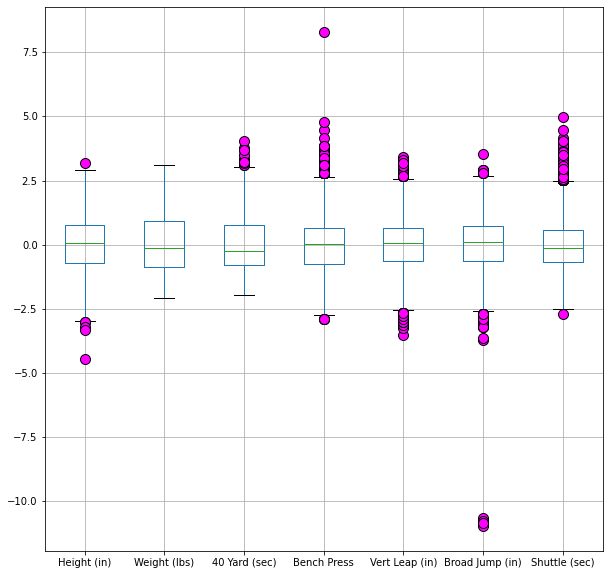

In [19]:
#use the scaled data in order to have all boxplots in the same range so it's easier to read.
df.boxplot(figsize = (10,10),flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'fuchsia'})

Analyzing the boxplot graph we see that all features besides the weight attribute has outliers.

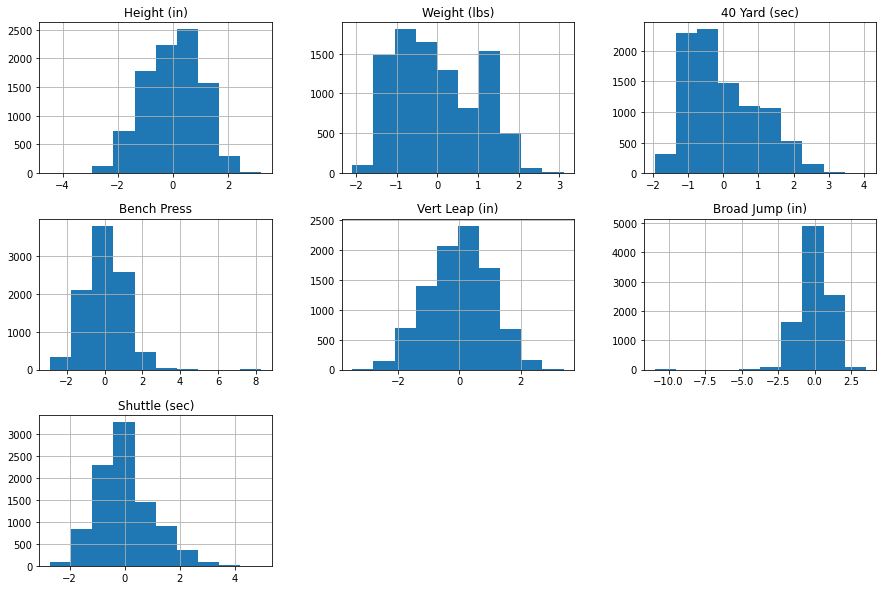

In [20]:
#Check for outliers in a histograph
df.hist(figsize = (15,10))
plt.show()

##Finding outliers using a formula

In [21]:
#Make a tempData with only numerical data in order to loop through the calculation, 
tempData = df.copy()
tempData.drop('Name', axis=1, inplace=True)
tempData.drop('POS', axis=1, inplace=True)
tempData.drop("Part of Game", axis = 1, inplace = True)

for i in tempData.columns:
    outliers= tempData[np.abs(tempData[i] - tempData[i].mean() ) > (2.5 * tempData[i].std())]
    print(i, outliers.shape)


Height (in) (49, 7)
Weight (lbs) (20, 7)
40 Yard (sec) (76, 7)
Bench Press (107, 7)
Vert Leap (in) (87, 7)
Broad Jump (in) (60, 7)
Shuttle (sec) (138, 7)


#Correlation between attributes

##Correlation between numerical features

Guide on reading a correlation matrix, is reported in the site, Statology.org. 

Strength of Correlation: 
* r < 0.25 	No Correlation
* 0.25 < r < 0.5 	Weak Correlation
* 0.5 < r < 0.75 	Moderate Correlation
* r > 0.75 	Strong Correlation

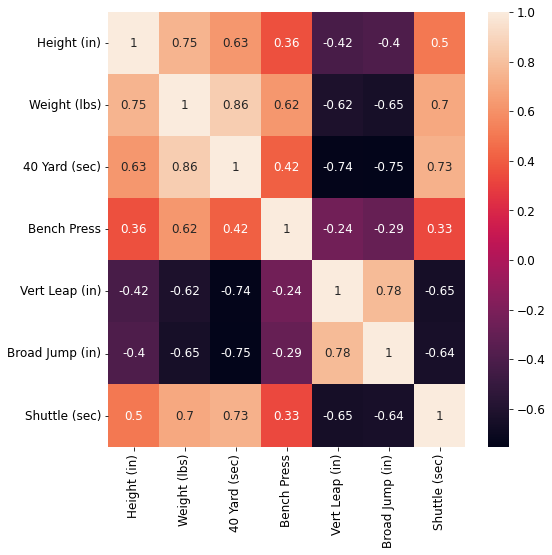

In [22]:
# view correlation matrix for the variables in the dataset
corrMatrix = df.corr()
# show visual representation of the correlation matrix
plt.rcParams.update({'font.size': 12,'figure.figsize':(8,8)})
f3 = sns.heatmap(corrMatrix, annot=True)
plt.show() # show plot

From the heatmap, we can see that two pairs of attributes have a "strong" correlation: 40 Yard Dash and Weight, and Broad Jump and Vertical Leap. Five others show "moderate" correlation: Weight and Height, 40 Yard Dash and Height, Bench Press and Weight, Weight and Shuttle, 40 Yard Dash and Shuttle.

Given that we are primarily interested in the 40 Yard Dash metric, the relation between 40 Yard Dash and Weight, Height, and Shuttle is notable. These r values indicate that Weight, and to a lesser extent Height and Shuttle, could be used as a statistically relevent way to predict performance on the 40 Yard Dash.

See scatter plot for all numeric feature with dependent feature. 

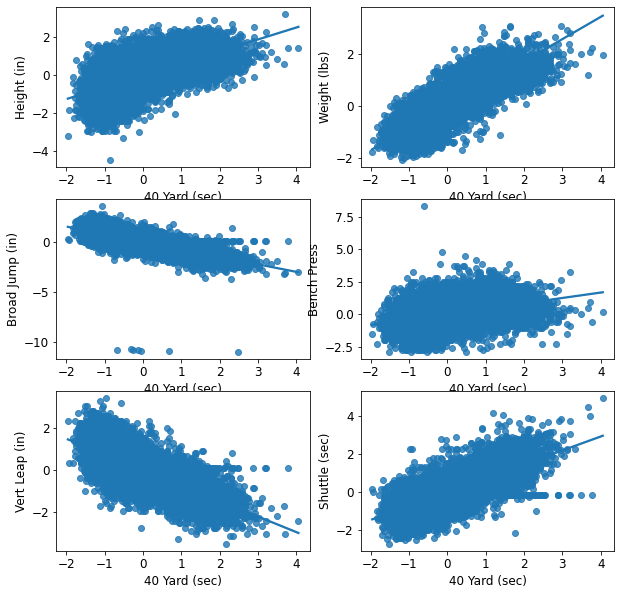

In [23]:
plt.figure(figsize=(10,10))

plt.subplot(321)
sns.regplot(x = '40 Yard (sec)',y = 'Height (in)', data = df)

plt.subplot(322)
sns.regplot(x = '40 Yard (sec)',y = 'Weight (lbs)', data = df)

plt.subplot(323)
sns.regplot(x = '40 Yard (sec)',y = 'Broad Jump (in)', data = df)

plt.subplot(324)
sns.regplot(x = '40 Yard (sec)',y = 'Bench Press', data = df)

plt.subplot(325)
sns.regplot(x = '40 Yard (sec)',y = 'Vert Leap (in)', data = df)

plt.subplot(326)
sns.regplot(x = '40 Yard (sec)',y = 'Shuttle (sec)', data = df)


plt.show()

Discussion of Results: Based on the scatterplots above, you can see that 3 of the indendent features: weight, shuttle and 3Cone have a positive relationship with the dependent feature 40 Yard. We also note that Vert leap and 40 Yard have a negative relationship.  

#Regression Models 

##Linear Regression Model

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [25]:
#make a copy of the original data and drop all the categorical datas and the depedent data to assign it to X.
tempDf = df.copy()
tempDf.drop(['40 Yard (sec)'], axis=1, inplace = True)
tempDf.drop('Name', axis=1, inplace = True)
tempDf.drop('POS', axis=1, inplace = True)
tempDf.drop('Part of Game', axis = 1, inplace = True)

#Assign X and y 
X = tempDf
y = df['40 Yard (sec)']
#make the test data's to be 25 percent of the whole dataset.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .25)
#np.bincount(X_test)

In [26]:
tempDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9288 entries, 1 to 13229
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Height (in)      9288 non-null   float64
 1   Weight (lbs)     9288 non-null   float64
 2   Bench Press      9288 non-null   float64
 3   Vert Leap (in)   9288 non-null   float64
 4   Broad Jump (in)  9288 non-null   float64
 5   Shuttle (sec)    9288 non-null   float64
dtypes: float64(6)
memory usage: 507.9 KB


In [27]:
#set up the regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [28]:
#let's now see how it performs on test data
yPredicted = lr.predict(X_test)
seePredic = pd.DataFrame({'Test': y_test, 'Predicted': yPredicted})
seePredic.head()

,Test,Predicted
12629,0.781120,0.586172
1753,0.183153,0.275227
5765,-1.138669,-1.318155
5731,-0.792478,-0.165222
5611,-0.603646,-0.420922


As you can see 5 examples of our predicted data and the actual data are not on point but also not too far off.

In [29]:
r2_score(y_test,yPredicted)

0.8354586952377557



R-square is a measure to see how close our predicted value is close to the actual values. 
A zero indicates nothing was predicted correctly and a 1 means it was perfectly predicted. 
Based on the R2 score, our linear regression model is moderately good.

##Lasso Regression


Lasso Regression includes L1 penalty this has the effect of shrinking the coefficient for those input variables that do not contributes much to the prediction. 

In [30]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
#Assign X and y 
lassoX = tempDf
lassoy = df['40 Yard (sec)']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .20, random_state = 0)

In [31]:
#See shapes of train data
X_train.shape
y_train.shape

(7430,)

In [32]:
#Set up the regression
l = Lasso(alpha=0.5)

In [33]:
#fit data
l.fit(X_train, y_train)

Lasso(alpha=0.5)

In [34]:
#See coefficients
i = 0
for j in tempDf:
  print('Coefficients for ', j,' is :', l.coef_[i])
  i=i+1

Coefficients for  Height (in)  is : 0.0
Coefficients for  Weight (lbs)  is : 0.33395140365991705
Coefficients for  Bench Press  is : 0.0
Coefficients for  Vert Leap (in)  is : -0.01816258033217508
Coefficients for  Broad Jump (in)  is : -0.02293692276149619
Coefficients for  Shuttle (sec)  is : 0.0


Here I displayed the coefficients for our lasso regression model variables. Some informations I gather from the coefficient number are that the longer someones 40-yard dash time,  the heavier the player seems to be. Also the shorter the 40-yard-dash time the longer the player’s vertical leap and broad jumps are. This information is in line with what we gathered from the correlation matrix, which is good. 


In [35]:
#Predict the data
yPredicted = l.predict(X_test)

In [36]:
#See mse
mean_squared_error(y_test, yPredicted)

0.5012713611599507

The MSE tells you how close the regression line is to a set of points, it does this by taking the distances from those points to the regression lines. These distances are called errors. Then those errors are squared to remove any negative signs. It is called the Mean Squared Error because we are finding the average of set of errors. The lower the MSE the better our model and better it predicts.The lowest a mse score can go is 0, and that means the model is perfect. As you can see our MSE is below 2 which is not too far off. 

In [37]:
r2_score(y_test,yPredicted)

0.49911266740239113

Based on the R2 score, our linear regression model did not so good. However we also have to take into account that lasso regression model used only 3 features while linear regression used 6 features.

## Decision Tree Regressor
Decision Tree is a decision-making tool that uses a flow chart like tree structure. It works for both continuous as well as categorical output variables.
It can be used as a classifier or regressor.
Decision Tree Regressor observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful output.



In [38]:
 # decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define dataset
tempDf = df.copy()
tempDf.drop(['40 Yard (sec)'], axis=1, inplace = True)
tempDf.drop('Name', axis=1, inplace = True)
tempDf.drop('POS', axis=1, inplace = True)
tempDf.drop('Part of Game', axis=1, inplace = True)
X = tempDf
y = df['40 Yard (sec)']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
yPredicted = regressor.predict(X_test)
seePredic = pd.DataFrame({'Test': y_test, 'Predicted': yPredicted})
seePredic.head()


,Test,Predicted
3124,-0.194511,-0.288927
3222,-0.761006,-0.981309
647,-0.540702,-0.792478
6032,1.599390,0.277568
6555,-0.320399,0.151681


In [39]:
r2_score(y_test,yPredicted)

0.6857551358005249

##Conlusion for the best model


Comparing our regression models , we conclude that the linear regression model which had the r-squared value of 83%, in comparison to the lasso regression model which had the r-squared value of 49%, and the decision tree regression model which had the r-squared value of  70% the  linear regression model  did much better in predicting the actual values of the data. Therefore, we think the linear regression model is the best model among the three models for our dataset 



## Conclusion
After the research, prepping,  cleaning, modeling and testing; we have come to the conclusion that there is a strong correlation with the 40 yard dash and weight. The data also points to a moderate correlation between the 40 yard dash and height; as well as a moderate correlation between the 40 yard dash and the shuttle.

Although more tests should be run in order to validate these findings, this may be a a treasure trove for scouts looking for that edge and for planners of the NFL combine to potentially invite diamonds-in-the-rough from some of the lesser known collegiate programs. 

The correlation here makes sense because sprinters who are lighter tend to be faster.Although there are anomalies(i.e DK Metcalf), it seems that the general adage holds true.

The findings on height is slightly surprising. There are a handful of taller sprinters but in general it may be that a low-center of gravity is more conducive to top-end speed. The shuttle is the most important find because the shuttle is a true test of agility and quick pivoting. If these two tie in well, scouts can use this information to make better decisions on prospects.

<h2>References</h2>

https://www.rookieroad.com/football/positions/positions-guide/

https://bleacherreport.com/articles/1537023-the-anatomy-and-importance-of-the-40-yard-dash

https://machinelearningmastery.com/calculate-feature-importance-with-python/

https://towardsdatascience.com/machine-learning-basics-decision-tree-regression-1d73ea003fda
